In [10]:
import numpy as np
from utils.database_repository import DataRepository
from utils.objects import *
import json
from matplotlib import pyplot as plt
from scipy.stats import norm
import statistics

In [11]:
repository = DataRepository()

Connected to MySQL Server version  5.7.40-43-log


In [12]:
def getProfilerData(id):
    query = "SELECT e.StartTime, e.Duration, e.Runs, d.Name as 'dutName', p.Name as 'profilerName', t.Name as 'testCaseName', r.Value FROM Experiment AS e JOIN Dut AS d ON e.DutId = d.id JOIN Profiler as p ON e.ProfilerId=p.Id JOIN TestCase as t ON e.TestCaseId = t.Id JOIN RawData as r ON e.id = r.ExperimentId WHERE e.profilerId = "+str(id)
    data = repository.query_all(query);
    return data

def getDut(data, dut):
    return [x for x in data if x[3] == dut]

In [13]:
HardwareMeasure = getProfilerData(5)
HardwareMonitor = getProfilerData(3)

In [14]:
# SurfaceBook = [x for x in data if x[3] == "SurfaceBook"]
# Surface4Pro = [x for x in data if x[3] == "Surface4Pro"]
# PowerKomplett = [x for x in data if x[3] == "PowerKomplett"]

In [22]:
def getEnergyConsumptionClamp(lst):
    return [ json.loads(x[6])["TrueRMS"] for x in lst ]

def getEnergyConsumptionHW(lst):
    return [ json.loads(x[6])[0]["cpuPowerPacketTotalJ"] for x in lst ]

def getEnergyConsumptionRapl(lst):
    start = [[ json.loads(x[6])["CoreStartInJoules"] for x in lst ]][0]
    stop = [[ json.loads(x[6])["CoreStopInJoules"] for x in lst ]][0]
    zipped = zip(start,stop)
    return [y-x for x,y in zipped]

def getEnergyConsumptionIntel(lst):
        return [ json.loads(x[6])["CumulativeProcessorEnergyInJoules"] for x in lst ]


def PlotEnergyConsumptionCLamp(dut):
    data = getEnergyConsumptionClamp(dut)
    #data.sort()
    plt.plot(data, 'k', linewidth=1)
    plt.show()

def PlotEnergyConsumptionHW(dut):
    data = getEnergyConsumptionClamp(dut)
    #data.sort()
    plt.plot(data, 'k', linewidth=1)
    plt.show()

def getTestcase(lst,case):
    #TestCaseIdle
    return [x for x in lst if x[5] == case ]

def getTestcaseNames(lst):
    return set([x[5] for x in lst])

def PlotEnergyConsumptionPerTestcase(dut, sort = False):
    cases = getTestcaseNames(dut)
    lines = {}
    for case in cases:
        lines[case] = getEnergyConsumptionHW(getTestcase(dut,case))
        data = getEnergyConsumptionHW(getTestcase(dut,case))
        if (sort):
            data.sort()
        plt.plot(data,label = case)
    plt.legend()
    plt.show()

def getTestCaseEnergyStats(lst):
    return (min(lst), max(lst), np.std(lst), np.mean(lst))

def PlotNormalDistribution(dut,case):
    NumData = getEnergyConsumption(getTestcase(dut,case))
    NumData.sort()
    mu, std = norm.fit(NumData) 


    plt.hist(NumData, bins=5, density=True, alpha=0.6, color='b')
    # plt.ylabel('some numbers')
    # plt.show()
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    
    plt.show()


[399.77852546772795, 73.295897972655, 73.5412138041317, 63.661012088035044, 71.62026122870172, 71.46477174913001, 81.55977876635828, 63.40710076599501, 58.87279405526331, 62.98173222194671, 62.97758444453498, 61.72300994310834, 72.71870607770329, 64.65499896326499, 97.03277094065501, 63.154722346025, 58.10518844181002, 62.91630381098501, 63.366231349323286, 60.67065672236004, 69.61356889373499, 71.87674186840168, 61.063727282510044, 63.59187733971999, 68.37223525781835, 66.10997142630836, 63.676533121638386, 63.40398801272496, 73.19565816278335, 59.623101963693315, 79.52584290535506, 70.16981968040338, 63.29887443285337, 66.705928981755, 64.59490747866168, 77.26279240785493, 63.84262481298843, 58.84331797199831, 71.80241345632506, 61.943661802388384, 58.78595175270164, 63.09478481962175, 64.45725973936659, 74.47539227757161, 63.68260756644666, 63.64961252356333, 63.40074528169499, 70.62692036318505, 63.40957616476497, 67.01266271536495, 58.57980346942834, 72.90378832457004, 63.46529483

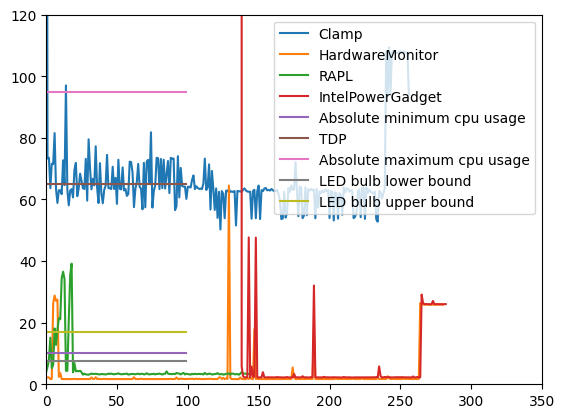

In [31]:
#PlotEnergyConsumption(getTestcase(PowerKomplett,"TestCaseIdle"))
# getTestcaseNames(PowerKomplett)
# PlotEnergyConsumptionPerTestcase(SurfaceBook)
# getTestCaseEnergyStats(Surface4Pro,"TestCaseIdle")

# dut = PowerKomplett
# PlotEnergyConsumptionPerTestcase(dut, sort = False)
#getTestcase(dut,"TestCaseIdleDelay")
#getTestcaseNames(dut)
HardwareMeasure = 5
HardwareMonitor = 3
RAPL = 4
IntelPowerGadget = 1
testCase="TestCaseIdle"
ClampKomplett = getDut(getProfilerData(HardwareMeasure), "PowerKomplett")
HWKomplett = getDut(getProfilerData(HardwareMonitor), "PowerKomplett")
RAPLKomplett=getDut(getProfilerData(RAPL), "PowerKomplett")
IntelKomplett = getDut(getProfilerData(IntelPowerGadget),"PowerKomplett")

m1 = [x/60 for x in getEnergyConsumptionClamp(getTestcase(ClampKomplett,testCase))]
m2 = [x/60 for x in getEnergyConsumptionHW(getTestcase(HWKomplett,testCase))]
m3 = [10 for x in range(0,100)]
m4 = [65 for x in range(0,100)]
m5 = [95 for x in range(0,100)]
m6 = [7.5 for x in range(0,100)]
m7 = [17 for x in range(0,100)]
m8 = [x/60 for x in getEnergyConsumptionRapl(getTestcase(RAPLKomplett,testCase))]
m9 = [x/60 for x in getEnergyConsumptionIntel(getTestcase(IntelKomplett,testCase))]
print(m1)

plt.plot(m1, label = "Clamp")
plt.plot(m2, label = "HardwareMonitor")
plt.plot(m8, label = "RAPL")
plt.plot(m9, label = "IntelPowerGadget")
plt.plot(m3, label = "Absolute minimum cpu usage")
plt.plot(m4, label = "TDP")
plt.plot(m5, label = "Absolute maximum cpu usage")
plt.plot(m6, label = "LED bulb lower bound")
plt.plot(m7, label = "LED bulb upper bound")

plt.title = testCase
plt.ylim([0,120]);
plt.xlim([0,350])
plt.legend()
plt.show()

In [23]:
ClampStat = getTestCaseEnergyStats([x/60 for x in getEnergyConsumptionClamp(getTestcase(ClampKomplett,testCase))])
HWState = getTestCaseEnergyStats([x/60 for x in getEnergyConsumptionHW(getTestcase(HWKomplett,testCase))])
#RAPLState = getTestCaseEnergyStats([x/60 for x in getEnergyConsumptionRapl(getTestcase(RAPLKomplett,testCase))])

print(f"Clamp min: {ClampStat[0]}, max: {ClampStat[1]} avg: {ClampStat[3]} std: {ClampStat[2]}")
print(f"HW min: {HWState[0]}, max: {HWState[1]} avg: {HWState[3]} std: {HWState[2]}")
#print(f"RAPL min: {RAPLState[0]}, max: {RAPLState[1]} avg: {RAPLState[3]}")

Clamp min: 82.556423082375, max: 126.66954083019819 avg: 106.1871509717792 std: 10.015893698486597
HW min: 26.048901335398355, max: 29.86869034767151 avg: 26.738636036978836 std: 0.9077949196028076


In [18]:
#PlotEnergyConsumptionPerTestcase(HWKomplett)
getTestcaseNames(ClampKomplett)

{'BinaryTrees',
 'DiningPhilosophers',
 'FannkuchRedux',
 'Fasta',
 'Nbody',
 'TestCaseIdle',
 'TestCaseIdle1secCStateDisabled',
 'TestCaseIdleCStateDisabled',
 'TestCaseIdleDelay'}